# Gráficas de linea, area, histogramas...

In [1]:
##pip install xlrd

In [2]:
##pip install openpyxl

In [3]:
##pip install numpy

In [4]:
##pip install pandas

In [36]:
##pip install matplotlib

In [5]:
import numpy as np 
import pandas as pd

In [6]:
df = pd.read_excel('datasets/Canada.xlsx',
                   sheet_name='Canada by Citizenship',
                   skiprows = range(20),
                   skipfooter = 2,
                   engine = 'openpyxl'
                  )
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [7]:
df.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [8]:
df.drop(['Type', 'Coverage',   'AREA', 'REG',
        'DEV',  'DevName'],
        axis = 1, inplace = True)

In [9]:
df.columns

Index([  'OdName', 'AreaName',  'RegName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [10]:
df.rename(columns = { 'OdName': 'Country', 'AreaName': 'Continent',  'RegName': 'Region'},
          inplace = True)
df.columns

Index([  'Country', 'Continent',    'Region',        1980,        1981,
              1982,        1983,        1984,        1985,        1986,
              1987,        1988,        1989,        1990,        1991,
              1992,        1993,        1994,        1995,        1996,
              1997,        1998,        1999,        2000,        2001,
              2002,        2003,        2004,        2005,        2006,
              2007,        2008,        2009,        2010,        2011,
              2012,        2013],
      dtype='object')

In [11]:
all(isinstance(x, str) for x in df.columns) #verifica si todos los elementos de columnas son str

True

In [12]:
import math

In [13]:
type(math.pi)

float

In [14]:
type('math.pi')

str

In [15]:
df.columns = list(map(str, df.columns))
df.columns

Index(['Country', 'Continent', 'Region', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013'],
      dtype='object')

In [19]:
all(isinstance(x, str) for x in df.columns) #verifica si todos los elementos de columnas son str

True

In [44]:
df['Total']=df.iloc[:, 3:].sum(axis=1)
df.head(2)

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,117262.0
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,31397.0


### Pregunta de investigación 1
#### Cuantas personas llegaron a Cánada desde 1980 a 2013 desde 'Afghanistan' ??

In [26]:
df.iloc[:1, :]

,Country,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639.0


### Pregunta de investigación 1
#### Cuantas personas llegaron a Cánada desde 1980 a 2013 desde 'Japon' ??

In [28]:
df.set_index('Country', inplace =True)
df.head(2)

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639.0
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699.0


<AxesSubplot:>

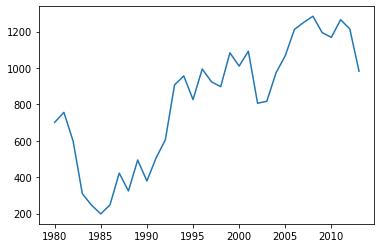

In [37]:
years = list(map(str, range(1980, 2014)))
df.loc['Japan', years].plot()

In [42]:
pd.set_option('display.max_rows', 200)

In [46]:
#df

In [47]:
years = list(map(str, range(1980, 2014)))
df.loc['Japan', 'Total']

27006.0

In [53]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:>

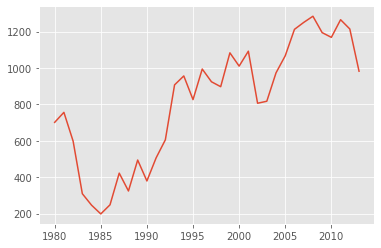

In [54]:
years = list(map(str, range(1980, 2014)))
df.loc['Japan', years].plot()

<AxesSubplot:>

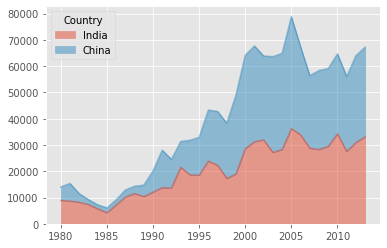

In [59]:
ndf= df.loc[['India', 'China'], years].transpose()
ndf.plot(kind = 'area', alpha = 0.5)

<AxesSubplot:>

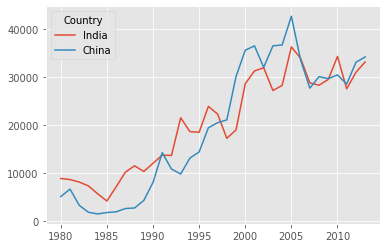

In [60]:
ndf= df.loc[['India', 'China'], years].transpose()
ndf.plot()

<AxesSubplot:>

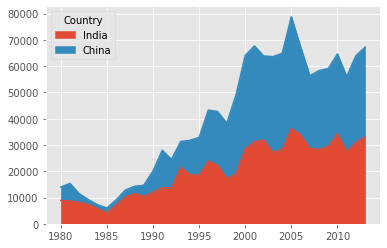

In [61]:
ndf= df.loc[['India', 'China'], years].transpose()
ndf.plot(kind = 'area')

Text(25, 78000, 'Max')

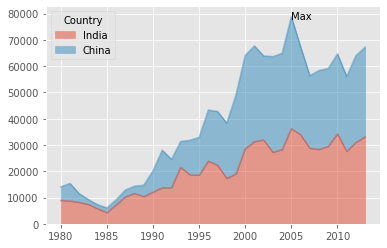

In [66]:
ndf= df.loc[['India', 'China'], years].transpose()
ndf.plot(kind = 'area', alpha = 0.5)
plt.text(25, 78000, 'Max', fontsize =10)

#### Cual es el comportamiento de numero de imigrantes a Cánada .... los 5 paises con mas numero de imigrantes 

In [71]:
Top_cinco = df.sort_values(['Total'],
               ascending = False,
              ).head(7)
Top_cinco

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,683024.0
China,Asia,Eastern Asia,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,654839.0
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,529455.0
Philippines,Asia,South-Eastern Asia,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,505340.0
Pakistan,Asia,Southern Asia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,240622.0
United States of America,Northern America,Northern America,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,231744.0
Iran (Islamic Republic of),Asia,Southern Asia,1172,1429,1822,1592,1977,1648,1794,2989,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,174751.0


In [72]:
#si esta algo en la tabla que queremos eliminar hacemos lo siguiente:

##top_cinco.drop (['Total', 'Unknown'], axis = 0, inplace = True)
##top_cinco

<AxesSubplot:xlabel='Country'>

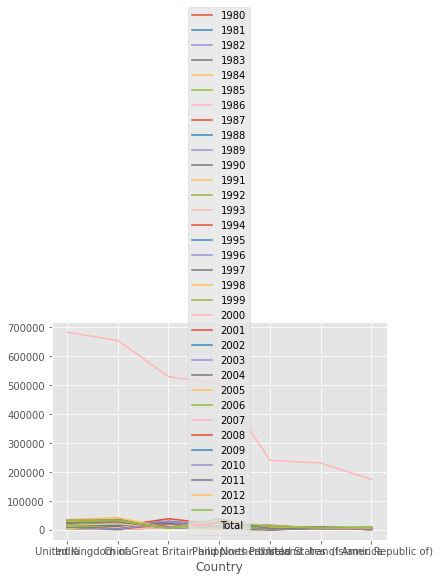

In [76]:
Top_cinco = df.sort_values(['Total'],
               ascending = False,
              ).head(7)
Top_cinco.plot()